In [1]:
# Analysis of Variance
# One Way Anova (Completely Randomized Design)
# Two Way Factorial Design 


# The one-way analysis of variance (ANOVA), also known as one-factor ANOVA, is an extension of independent two-samples t-test for comparing means in a situation where there are more than two groups.

# Null hypothesis: the means of the different groups are the same
# Alternative hypothesis: At least one sample mean is not equal to the others.

In [2]:
#Assume that we have 3 groups (A, B, C) to compare:

#Compute the common variance, which is called variance within samples (S2within) or residual variance.
#Compute the variance between sample means as follow:
#Compute the mean of each group
#Compute the variance between sample means (S2between)
#Produce F-statistic as the ratio of S2between/S2within.

In [3]:
#  stringsAsFactors = FALSE,
data2 <- read.csv("cereals.csv", header = TRUE,
                 stringsAsFactors = FALSE,
                 strip.white = TRUE ,
                 sep = ',')

print(str(data2))

'data.frame':	74 obs. of  16 variables:
 $ name    : chr  "100%_Bran" "100%_Natural_Bran" "All-Bran" "All-Bran_with_Extra_Fiber" ...
 $ mfr     : chr  "N" "Q" "K" "K" ...
 $ type    : chr  "C" "C" "C" "C" ...
 $ calories: int  70 120 70 50 110 110 110 130 90 90 ...
 $ protein : int  4 3 4 4 2 2 2 3 2 3 ...
 $ fat     : int  1 5 1 0 2 2 0 2 1 0 ...
 $ sodium  : int  130 15 260 140 200 180 125 210 200 210 ...
 $ fiber   : num  10 2 9 14 1 1.5 1 2 4 5 ...
 $ carbo   : num  5 8 7 8 14 10.5 11 18 15 13 ...
 $ sugars  : int  6 8 5 0 8 10 14 8 6 5 ...
 $ potass  : int  280 135 320 330 -1 70 30 100 125 190 ...
 $ vitamins: int  25 0 25 25 25 25 25 25 25 25 ...
 $ shelf   : int  3 3 3 3 3 1 2 3 1 3 ...
 $ weight  : num  1 1 1 1 1 1 1 1.33 1 1 ...
 $ cups    : num  0.33 1 0.33 0.5 0.75 0.75 1 0.75 0.67 0.67 ...
 $ rating  : num  68.4 34 59.4 93.7 34.4 ...
NULL


In [5]:
# Run the one-way ANOVA model
library("dplyr")
data2= data2 %>% na.omit()
result <- aov(data2$calories ~ data2$mfr, data=data2)
summary(result)

            Df Sum Sq Mean Sq F value Pr(>F)  
data2$mfr    6   4092   682.0   2.203 0.0533 .
Residuals   67  20737   309.5                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [6]:
# Tukey multiple pairwise-comparisons
TukeyHSD(result)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = data2$calories ~ data2$mfr, data = data2)

$`data2$mfr`
          diff        lwr         upr     p adj
G-A  11.363636 -43.314669 66.04194167 0.9955010
K-A   8.695652 -45.930948 63.32225221 0.9989838
N-A -13.333333 -71.094488 44.42782086 0.9920656
P-A   7.500000 -49.220327 64.22032743 0.9996491
Q-A  -5.000000 -61.720327 51.72032743 0.9999672
R-A   3.333333 -54.427821 61.09448753 0.9999973
K-G  -2.667984 -18.615516 13.27954723 0.9986533
N-G -24.696970 -49.326409 -0.06753079 0.0489315
P-G  -3.863636 -25.941994 18.21472114 0.9982651
Q-G -16.363636 -38.441994  5.71472114 0.2822644
R-G  -8.030303 -32.659742 16.59913587 0.9542591
N-K -22.028986 -46.543423  2.48545150 0.1062640
P-K  -1.195652 -23.145646 20.75434170 0.9999981
Q-K -13.695652 -35.645646  8.25434170 0.4897093
R-K  -5.362319 -29.876756 19.15211816 0.9940584
P-N  20.833333  -8.047244 49.71391043 0.3132788
Q-N   8.333333 -20.547244 37.2139

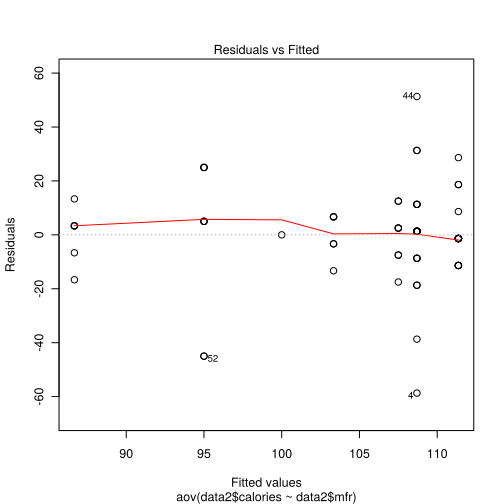

In [12]:
# The ANOVA test assumes that, the data are normally distributed and the variance across groups are homogeneous. We can check that with some diagnostic plots. 

# 1. Homogeneity of variances
plot(result, 1)


In [14]:
library(car)
leveneTest(calories ~ mfr, data = data2)

# above 0.05 ,means Homogenous

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”

,Df,F value,Pr(>F)
group,6,1.606944,0.1588844
,67,NA,NA


In [17]:
# Non-parametric alternative to one-way ANOVA test
kruskal.test(as.numeric(calories) ~ sugars, data = data2)
# all group levels must be finite


	Kruskal-Wallis rank sum test

data:  as.numeric(calories) by sugars
Kruskal-Wallis chi-squared = 49.105, df = 16, p-value = 3.18e-05


In [22]:
# Two-way ANOVA with interaction effect  = "*"
res.aov2b <- aov(rating ~ mfr * type, data = data2)
summary(res.aov2b)

            Df Sum Sq Mean Sq F value   Pr(>F)    
mfr          6   5513   918.8   6.429 2.35e-05 ***
type         1     12    11.7   0.082    0.775    
mfr:type     1     74    74.0   0.518    0.474    
Residuals   65   9289   142.9                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [24]:
# Two-way ANOVA 
res.aov2b <- aov(rating ~ mfr + type, data = data2)
summary(res.aov2b)

            Df Sum Sq Mean Sq F value   Pr(>F)    
mfr          6   5513   918.8   6.477 2.09e-05 ***
type         1     12    11.7   0.083    0.775    
Residuals   66   9363   141.9                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [33]:
library("dplyr")
group_by(data2, mfr) %>%
  summarise(
    count = n(),
    mean = mean(rating, na.rm = TRUE),
    sd = sd(rating, na.rm = TRUE)
  )

mfr,count,mean,sd
A,1,54.85092,NA
G,22,34.48585,8.946704
K,23,44.03846,14.457434
N,6,67.96857,5.509326
P,8,41.80433,10.736732
Q,8,42.91599,16.797673
R,6,43.51122,5.681039


In [34]:
TukeyHSD(res.aov2b, which = "mfr")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = rating ~ mfr + type, data = data2)

$mfr
           diff        lwr       upr     p adj
G-A -20.3650653 -57.400265 16.670134 0.6365230
K-A -10.8124547 -47.812633 26.187723 0.9730631
N-A  13.1176502 -26.005652 52.240952 0.9476736
P-A -13.0465857 -51.464906 25.371734 0.9444682
Q-A -11.9349271 -50.353247 26.483393 0.9636250
R-A -11.3396922 -50.462994 27.783610 0.9741389
K-G   9.5526107  -1.249114 20.354335 0.1171865
N-G  33.4827155  16.800483 50.164948 0.0000013
P-G   7.3184796  -7.635831 22.272790 0.7506602
Q-G   8.4301382  -6.524173 23.384449 0.6090926
R-G   9.0253732  -7.656859 25.707605 0.6539275
N-K  23.9301048   7.325767 40.534443 0.0008150
P-K  -2.2341311 -17.101497 12.633235 0.9992654
Q-K  -1.1224725 -15.989839 13.744894 0.9999868
R-K  -0.5272375 -17.131575 16.077100 0.9999999
P-N -26.1642359 -45.725887 -6.602585 0.0023681
Q-N -25.0525773 -44.614228 -5.490926 0.0041552
R-N -24.4573423 -4